This notebook shows a simplified application of the gradient descent algorithm, to fit a regression model with one parameter (i.e. finding the slope of the regression line to get the best estimation).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from IPython.display import display

%matplotlib inline

The data consists in a sample of 20 observations. For each individual, we have the age, the weight and the systolic pressure. Column "age" is removed from dataframe for simplicity

In [2]:
df=pd.read_csv("systolic_blood_press.csv")
del df['age']
display(df.head())
display(df.describe())
m = len(df) # number of observations

,systolic_press,weight
0,132,78
1,140,80
2,143,83
3,153,88
4,162,96


,systolic_press,weight
count,20.000000,20.00000
mean,146.350000,85.50000
std,14.925341,10.17996
min,124.000000,66.00000
25%,131.500000,79.50000
50%,146.500000,85.00000
75%,159.750000,92.50000
max,168.000000,104.00000


A scatter plot between weight and systolic pressure shows a strong correlation. This can be modelized with a regression line. In this example, the intercept is deliberately null to keep the example simple. The instruction <i>sm.OLS</i> finds the best regression line slope so that the SSR (sum of squared residuals) is the lowest possible.

Slope from statsmodels OLS: 1.70699987852
SSR from statsmodels 842.399725998


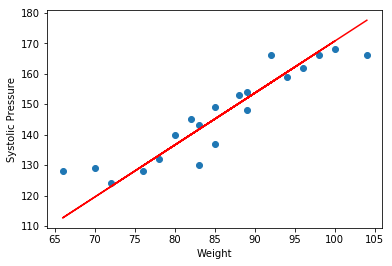

In [3]:
# Fit regression model
plt.scatter(x=df.weight, y=df.systolic_press)
model=sm.OLS(df.systolic_press, df.weight) #no intercept
res=model.fit()
slope=res.params['weight']

# Plot the regression line
abline_values = [slope*i for i in df.weight]
plt.plot(df.weight, abline_values, color="red")
plt.xlabel("Weight")
plt.ylabel("Systolic Pressure")

# Values found by stats_model
print("Slope from statsmodels OLS:", slope)
print("SSR from statsmodels", res.ssr)

The more the line fits, the less SSR is, and vice versa. This can be expressed as a cost function. This last takes domain of parameter to find in input (here the slope of the regression line), and outputs the corresponding SSR. This function has a minimum where x is the best parameter, and y the minimum corresponding SSR.

SSR returned by the cost function: 842.399725998
SSR from statsmodels: 842.399725998


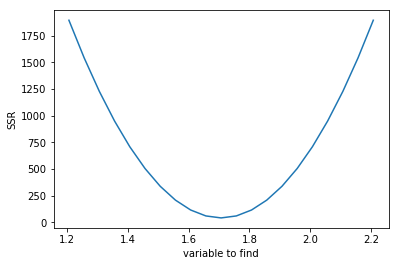

In [4]:
def cost_function(coefficient):
    error_squared=0
    # iterate through the sample and sum the squares of the distance between each point to the regression line
    for row in df.itertuples():
        index, systolic_press, weight = row
        estimated_y=coefficient*weight
        error_squared += np.square(systolic_press-estimated_y)
    return error_squared/len(df)

# Visualize the cost function
cost_x = np.arange(slope-0.5, slope+0.55, 0.05)
cost_y = [cost_function(i) for i in cost_x]
plt.plot(cost_x, cost_y)
plt.xlabel("variable to find")
plt.ylabel("SSR")

print("SSR returned by the cost function:", cost_function(slope)*m)
print("SSR from statsmodels:", res.ssr)

All the point of gradient descent is to find this minimum. Because the cost function is convex, it has a unique minimum which is local and global. Thus, one could use its derivative to find its minimum. Gradient descent starts with an initial guess and improves it at each iteration, so that it tends to the value minimizing the cost function. While approaching the minimum, the slope tends to null, and gradients are smaller and smaller (convergence).

In [5]:
def gradient_descent_iter(min_x):
    # if alpha is too big, the algorithm will not converge and "jump" above the minimum
    alpha = 0.0001
    epsilon = 0.00001
    max_iteration = 100 #in case of no convergence (alpha too big)
    iter = 0
    while True:
        iter += 1
        # at each gradient, it iterates through the sample (sum(..), not efficient on large samples)
        derivative = sum([(min_x*df.weight[i] - df.systolic_press[i])*df.weight[i] for i in range(m)]) / m
        min_x = min_x - (alpha*derivative)
        if (abs(derivative) < epsilon) or (iter > max_iteration):
            return min_x

In [6]:
min_x = gradient_descent_iter(0)
print("Found by gradient descent:", min_x)
print("From Statsmodels:", slope)

Found by gradient descent: 1.70699987834
From Statsmodels: 1.70699987852
